# Garbage Classification

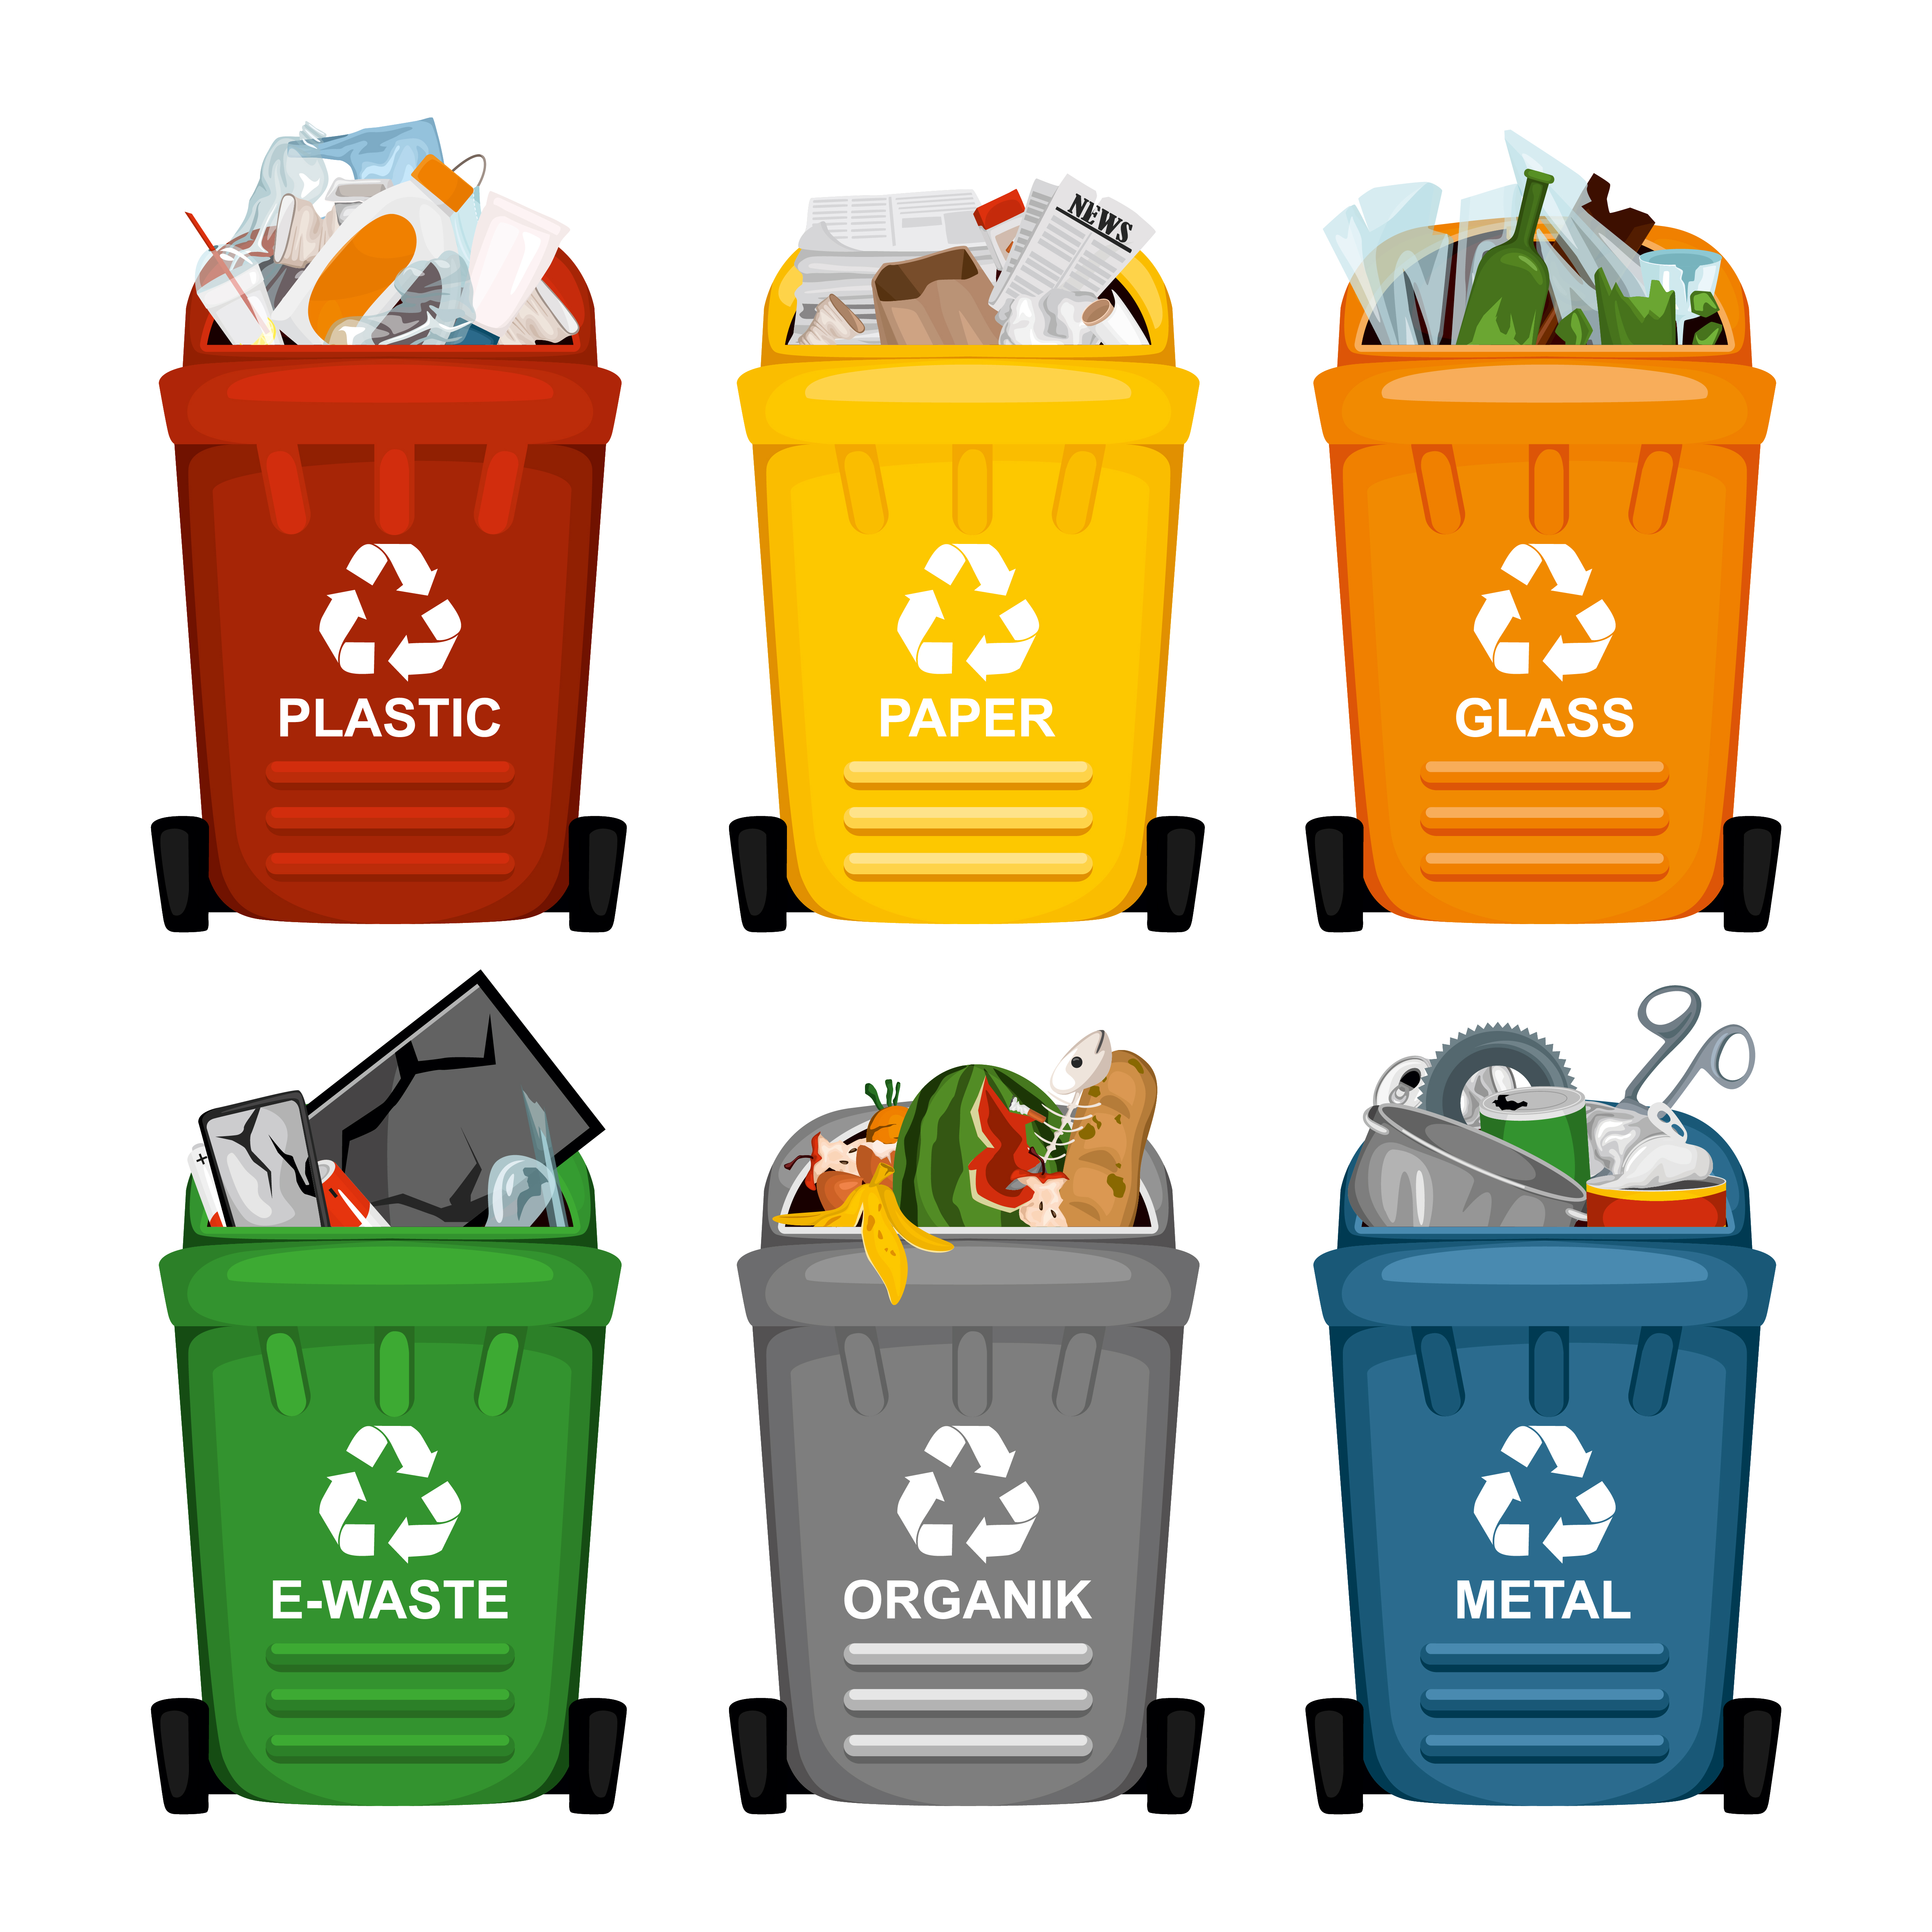

In [1]:
from IPython.display import Image
from IPython.display import display
display(Image(filename='garbage.jpg',height=130))

In [2]:
# !unzip '/home/sinsagar/Downloads/archive(2).zip'

# Importing Libraries

In [3]:
import numpy as np
import os
import pandas as pd
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D,MaxPooling2D,Flatten,Dense
import matplotlib.pyplot as plt
from PIL import Image
import warnings
warnings.filterwarnings('ignore')
tf.get_logger().setLevel('ERROR')

2023-11-05 22:29:49.989609: I tensorflow/core/util/port.cc:111] oneDNN custom operations are on. You may see slightly different numerical results due to floating-point round-off errors from different computation orders. To turn them off, set the environment variable `TF_ENABLE_ONEDNN_OPTS=0`.
2023-11-05 22:29:49.991564: I tensorflow/tsl/cuda/cudart_stub.cc:28] Could not find cuda drivers on your machine, GPU will not be used.
2023-11-05 22:29:50.017130: E tensorflow/compiler/xla/stream_executor/cuda/cuda_dnn.cc:9342] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
2023-11-05 22:29:50.017160: E tensorflow/compiler/xla/stream_executor/cuda/cuda_fft.cc:609] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
2023-11-05 22:29:50.017184: E tensorflow/compiler/xla/stream_executor/cuda/cuda_blas.cc:1518] Unable to register cuBLAS factory: Attempting to regi

# Loading Dataset

In [4]:
dataset_path='/home/sinsagar/Downloads/archive(1)/Garbage classification/Garbage classification'

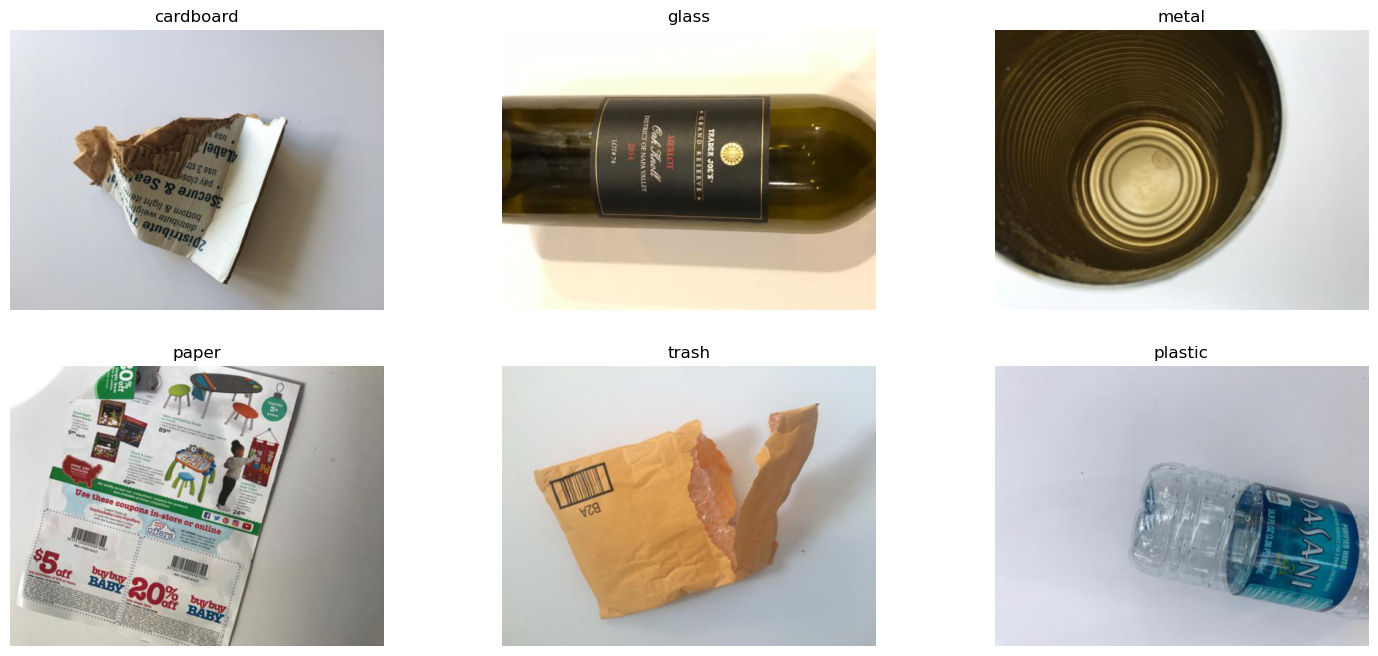

In [5]:
categories = ['cardboard', 'glass', 'metal', 'paper', 'trash', 'plastic']
num_images_to_display = len(categories)

plt.figure(figsize=(18, 8))

for i, category in enumerate(categories):
    image_files = os.listdir(os.path.join(dataset_path, category))

    if len(image_files) > 0:
        image_path = os.path.join(dataset_path, category, image_files[0])
        image = Image.open(image_path)
        
        plt.subplot(2, 3, i + 1)
        plt.imshow(image)
        plt.title(category)
        plt.axis('off')

plt.show()


In [6]:
batch_size = 32
epochs = 100
image_size = (150,150)

In [7]:
train_datagen = ImageDataGenerator(
    rescale = 1./255 ,
    validation_split = 0.2,
    rotation_range=15,
    width_shift_range=0.1,
    height_shift_range=0.1,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True)

In [8]:
training_generator = train_datagen.flow_from_directory(
    dataset_path,
    target_size = image_size,
    batch_size = batch_size,
    class_mode = 'categorical',
    subset = 'training'
)

Found 2024 images belonging to 6 classes.


In [9]:
validation_generator = train_datagen.flow_from_directory(
    dataset_path,
    target_size = image_size,
    batch_size = batch_size,
    class_mode = 'categorical',
    subset = 'validation'
)

Found 503 images belonging to 6 classes.


In [10]:
labels = (training_generator.class_indices)
labels = dict((v,k) for k,v in labels.items())
print(labels)

{0: 'cardboard', 1: 'glass', 2: 'metal', 3: 'paper', 4: 'plastic', 5: 'trash'}


In [11]:
model = Sequential()
model.add(Conv2D(32,(3,3),activation='relu',input_shape = (image_size[0],image_size[1],3)))
model.add(MaxPooling2D(2,2))

model.add(Conv2D(32,(3,3), padding='same', input_shape=(image_size[0],image_size[1],3),activation='relu'))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Conv2D(32,(3,3), padding='same', activation='relu'))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Conv2D(64,(3,3), padding='same', activation='relu'))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Conv2D(128,(3,3), padding='same', activation='relu'))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Conv2D(256,(3,3), padding='same', activation='relu'))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Flatten())
model.add(Dense(6,activation='softmax'))

model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 148, 148, 32)      896       
                                                                 
 max_pooling2d (MaxPooling2  (None, 74, 74, 32)        0         
 D)                                                              
                                                                 
 conv2d_1 (Conv2D)           (None, 74, 74, 32)        9248      
                                                                 
 max_pooling2d_1 (MaxPoolin  (None, 37, 37, 32)        0         
 g2D)                                                            
                                                                 
 conv2d_2 (Conv2D)           (None, 37, 37, 32)        9248      
                                                                 
 max_pooling2d_2 (MaxPoolin  (None, 18, 18, 32)        0

In [12]:
model.compile(
    optimizer='adam',
    loss='categorical_crossentropy',
    metrics=['accuracy']
)

In [13]:
history = model.fit(training_generator,
          steps_per_epoch = training_generator.samples //batch_size,
           validation_data=validation_generator,
           validation_steps = validation_generator.samples // batch_size,
                    epochs = 64)

Epoch 1/64
63/63 [==============================] - 17s 253ms/step - loss: 1.6594 - accuracy: 0.2676 - val_loss: 1.6045 - val_accuracy: 0.2958
Epoch 2/64
63/63 [==============================] - 16s 248ms/step - loss: 1.4554 - accuracy: 0.4051 - val_loss: 1.4980 - val_accuracy: 0.3854
Epoch 3/64
63/63 [==============================] - 15s 241ms/step - loss: 1.3747 - accuracy: 0.4312 - val_loss: 1.5167 - val_accuracy: 0.3646
Epoch 4/64
63/63 [==============================] - 15s 242ms/step - loss: 1.2684 - accuracy: 0.4975 - val_loss: 1.4294 - val_accuracy: 0.3812
Epoch 5/64
63/63 [==============================] - 15s 241ms/step - loss: 1.2180 - accuracy: 0.5151 - val_loss: 1.4432 - val_accuracy: 0.4167
Epoch 6/64
63/63 [==============================] - 15s 236ms/step - loss: 1.1273 - accuracy: 0.5758 - val_loss: 1.4914 - val_accuracy: 0.4458
Epoch 7/64
63/63 [==============================] - 15s 239ms/step - loss: 1.1340 - accuracy: 0.5685 - val_loss: 1.3350 - val_accuracy: 0.4604

Epoch 58/64
63/63 [==============================] - 15s 242ms/step - loss: 0.2376 - accuracy: 0.9101 - val_loss: 1.1514 - val_accuracy: 0.6771
Epoch 59/64
63/63 [==============================] - 15s 243ms/step - loss: 0.1676 - accuracy: 0.9453 - val_loss: 1.3402 - val_accuracy: 0.6812
Epoch 60/64
63/63 [==============================] - 15s 241ms/step - loss: 0.2144 - accuracy: 0.9307 - val_loss: 1.3273 - val_accuracy: 0.6917
Epoch 61/64
63/63 [==============================] - 15s 242ms/step - loss: 0.1883 - accuracy: 0.9317 - val_loss: 1.2820 - val_accuracy: 0.6958
Epoch 62/64
63/63 [==============================] - 15s 246ms/step - loss: 0.1910 - accuracy: 0.9332 - val_loss: 1.2805 - val_accuracy: 0.6896
Epoch 63/64
63/63 [==============================] - 16s 247ms/step - loss: 0.2084 - accuracy: 0.9242 - val_loss: 1.3618 - val_accuracy: 0.6854
Epoch 64/64
63/63 [==============================] - 15s 242ms/step - loss: 0.1966 - accuracy: 0.9292 - val_loss: 1.2990 - val_accuracy:

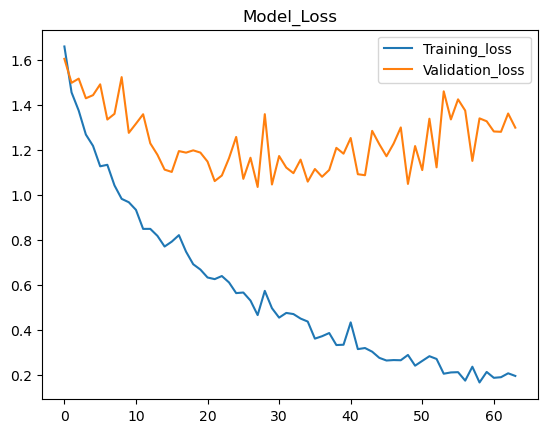

In [14]:
import matplotlib.pyplot as plt
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model_Loss')
plt.legend(['Training_loss','Validation_loss'])
plt.show()

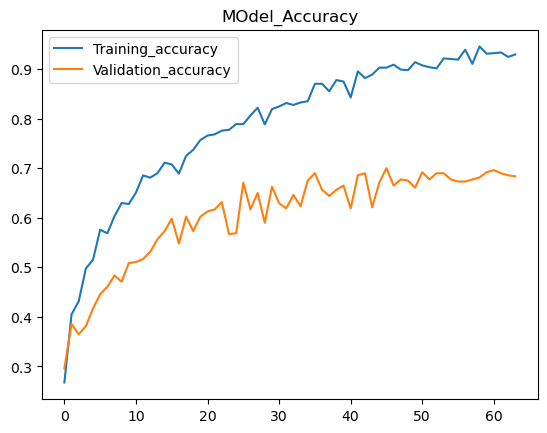

In [15]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('MOdel_Accuracy')
plt.legend(['Training_accuracy','Validation_accuracy'])

plt.show()

In [16]:
from tensorflow.keras.preprocessing import image

def predict_image(image_path):

    img = image.load_img(image_path,target_size = image_size)
    img = image.img_to_array(img)
    img = np.expand_dims(img,axis = 0)
    img /=255.0 

    prediction = model.predict(img)
    return prediction

In [17]:
pic ='/home/sinsagar/Downloads/archive(1)/garbage classification/Garbage classification/cardboard/cardboard1.jpg'

In [18]:
prediction = predict_image(pic)
print(prediction)
labels[prediction[0].argmax()]

1/1 [==============================] - 0s 73ms/step
[[9.9999833e-01 2.0208040e-07 5.2793578e-09 1.2275855e-09 1.4133916e-06
  2.7147067e-08]]


'cardboard'

In [19]:
pic2='/home/sinsagar/Garbage classification/Garbage classification/paper/paper3.jpg'

In [20]:
prediction = predict_image(pic2)
print(prediction)
labels[prediction[0].argmax()]

1/1 [==============================] - 0s 13ms/step
[[3.7705740e-05 4.6493576e-04 5.7071047e-03 9.8775345e-01 4.9647023e-03
  1.0720406e-03]]


'paper'

In [21]:
model.save('/home/sinsagar/Downloads/garbage_classification.h5')

In [22]:
from tensorflow.keras.models import load_model

model = load_model('/home/sinsagar/Downloads/garbage_classification.h5')  # Load your trained model
